In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
#loading train data set

with open('capacitor_dataset.pickle','rb') as f:
    file_train = pickle.load(f)
    train = pd.DataFrame(file_train,columns = ['Time','Charge'])
#     print(train)
    print(len(train))

1000


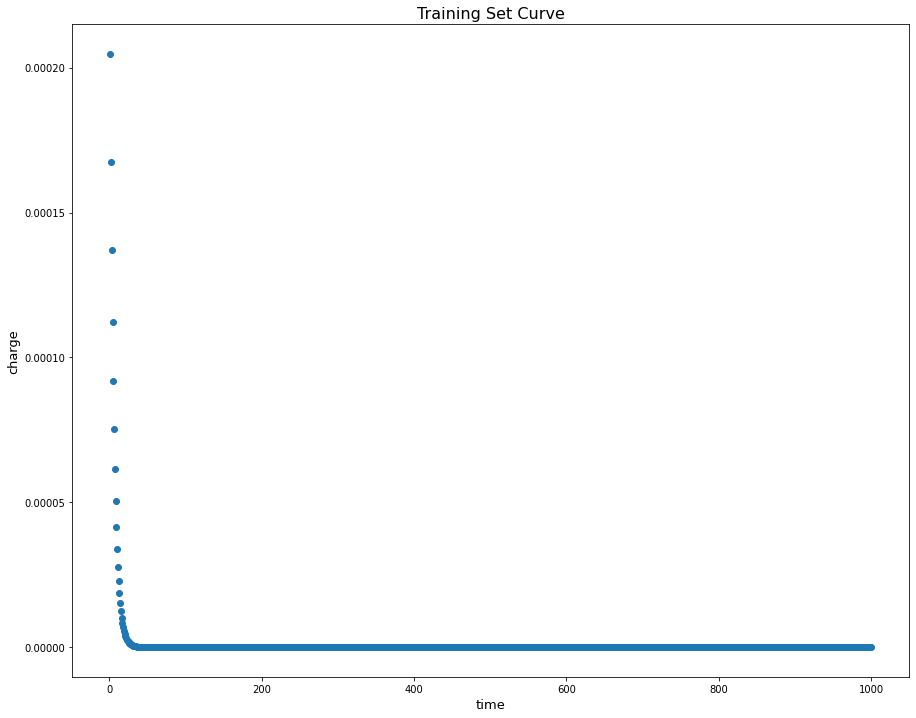

In [3]:
# Plotting the Training set

plt.figure(figsize=(15,12))
plt.scatter(train['Time'], train['Charge'])
plt.xlabel('time', fontsize=13)
plt.ylabel('charge', fontsize=13)
plt.title('Training Set Curve', fontsize=16)
plt.show()

Given graph depicts charge (on Y axis) as s function of time (on X axis)

In [4]:
train_time = train['Time']
train_charge = train['Charge']
vo = 5.0

ln_charge = np.log(train_charge)

# print(train_time)
# print(train_charge)

Now we have the formula 
q = CV * exp(-t/RC) <br>
q = Q * exp(-t/RC) <br>
Q -> initial charge on capacitor <br>
R -> Resistance of capacitor <br>
C -> Capacitance of capacitor <br>
t ->time <br>

Now taking natural logarithm on both sides, <br>

ln(q) = ln(CVo * exp(-t/RC)) <br>
ln(q) = ln(CVo)) + ln(exp(-t/RC) <br>
ln(q) = ln(CVo) - t/RC <br>

Now ln(q) varies linearly with t, with slope = -1/RC, y-intercept = ln(CVo).<br>

We now apply linear regression to this.

In [5]:
train_time = np.array(train_time).reshape(-1,1)
trained_model = LinearRegression().fit(train_time, ln_charge)

# Extract slope and intercept
slope = trained_model.coef_[0]   #extracting slope from trained model
intercept = trained_model.intercept_  #extracting intercept from trained model

since slope = -1/RC, <br>
RC = -1/slope <br>
and <br>
ln(CVo) = y-intercept <br>
ln(c * 5) = y-intercept <br>
c * 5 = exp(y-intercept) <br>
c = exp(y-intercept)/5

In [6]:
# Print results
print("Slope m = {:.4f}".format(slope))
print("Intercept b = {:.4f}".format(intercept))

Slope m = -0.2000
Intercept b = -8.2940


In [7]:
C = np.exp(intercept)/5.000
R = -1.0/(slope*C)

print(f"Capacitance C = {C:.8f} Farads")
print(f"Resistance R = {R:.8f} Ohms")

Capacitance C = 0.00005000 Farads
Resistance R = 100000.00000001 Ohms
